In [4]:
import patchedimage_naive as pnaive
import patchedimage as p
from utilities import *
import time
from matplotlib import pyplot as plt
from matplotlib import ticker

In [5]:
patch_sizes = np.arange(1, 10)
execution_time_naive = []
execution_time = []

print(patch_sizes)

[1 2 3 4 5 6 7 8 9]


In [6]:
for size in []:
    start = time.time()

    imnaiv = pnaive.PatchedImage("images/maison.tif",size,search_mode="Local")
    masque = masque_circulaire((100,80),40,imnaiv.img.shape,color=False)
    imnaiv.set_masque(draw=False,masque=masque)
    imnaiv.set_priorities()

    res = imnaiv.reconstruction_auto()

    execution_time_naive.append(time.time()-start)

#np.save('execution_time_naive.npy', execution_time_naive)

In [7]:
for size in []:
    start = time.time()

    im = p.PatchedImage("images/maison.tif",size,search_mode="Local")
    masque = masque_circulaire((100,80),40,im.img.shape,color=False)
    im.set_masque(draw=False,masque=masque,leaf_size=256)
    im.set_priorities()

    res = im.reconstruction_auto()

    execution_time.append(time.time()-start)

#np.save('execution_time.npy', execution_time)

In [8]:
time_avec_zone, time_sans_zone = [], []

for size in []:
    start = time.time()

    im = p.PatchedImage("images/maison.tif",size,search_mode="Local")
    masque = masque_circulaire((100,80),40,im.img.shape,color=False)
    im.set_masque(draw=False,masque=masque,leaf_size=256)
    im.set_priorities()

    res = im.reconstruction_auto()

    time_avec_zone.append(time.time()-start)

#np.save('time_avec_zone.npy', time_avec_zone)

for size in patch_sizes:
    start = time.time()

    im = p.PatchedImage("images/maison.tif",size,search_mode="Full")
    im.set_priorities()

    res = im.reconstruction_auto()

    time_sans_zone.append(time.time()-start)

np.save('time_sans_zone.npy', time_sans_zone)

None


TypeError: cannot unpack non-iterable NoneType object

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

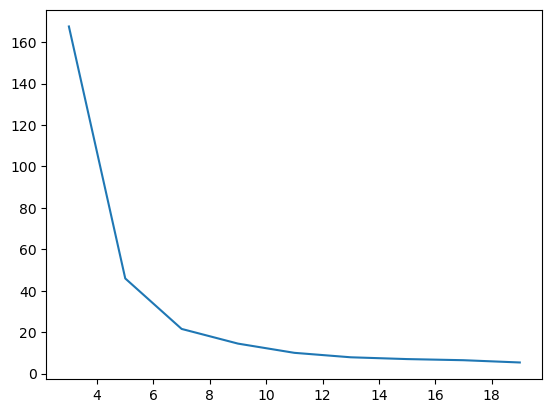

In [ ]:
time_avec_zone = np.array(time_avec_zone)
time_sans_zone = np.array(time_sans_zone)

plt.plot(2*patch_sizes+1, time_avec_zone, label='Naive Execution Time')
plt.plot(2*patch_sizes+1, time_sans_zone, label='Optimized Execution Time')
plt.xlabel('Patch Size')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Patch Size')
plt.yscale('log')
plt.yticks([10, 100, 300], ['10s', '100s', '300s'])  # Set y-ticks to nice values
plt.legend()
plt.show()

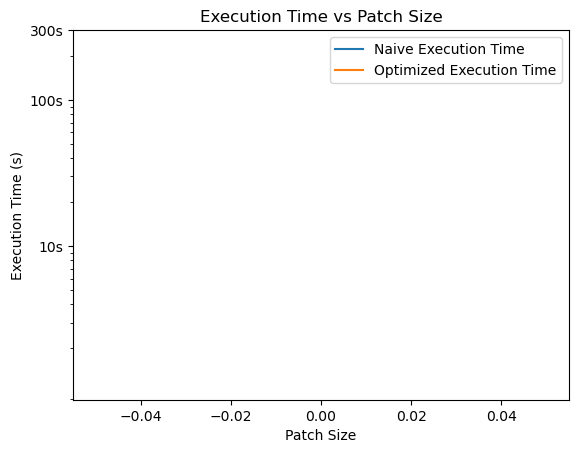

In [ ]:
execution_time_naive = np.array(execution_time_naive)
execution_time = np.array(execution_time)

plt.plot(2*patch_sizes+1, execution_time_naive, label='Naive Execution Time')
plt.plot(2*patch_sizes+1, execution_time, label='Optimized Execution Time')
plt.xlabel('Patch Size')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Patch Size')
plt.yscale('log')
plt.yticks([10, 100, 300], ['10s', '100s', '300s'])  # Set y-ticks to nice values
plt.legend()
plt.show()